##### Laod libs:

In [1]:
import pandas as pd
import sqlite3

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [3]:
data=pd.io.sql.read_sql(
	"SELECT COALESCE(tt1.date,tt2.date) AS date, COALESCE(tt1.commit_cnt,0) AS commit_cnt, COALESCE(tt2.views_cnt,0) AS views_cnt FROM "
	"(SELECT date, COUNT(*) AS commit_cnt FROM (SELECT DATE(timestamp) AS date FROM checker WHERE uid LIKE 'user_%') t1 GROUP BY date) tt1 " \
	"FULL JOIN " \
	"(SELECT date, COUNT(*) AS views_cnt FROM (SELECT DATE(datetime) AS date FROM pageviews WHERE uid LIKE 'user_%') t2 GROUP BY date) tt2 " \
	"ON tt2.date=tt1.date",
	connect
).rename(columns={'commit_cnt':'commit','views_cnt':'views'})
data['date']=pd.to_datetime(data['date']).dt.date
data

,date,commit,views
0,2020-04-17,23,1
1,2020-04-18,69,23
2,2020-04-19,33,15
3,2020-04-20,25,0
4,2020-04-21,25,3
5,2020-04-22,28,1
6,2020-04-23,43,5
7,2020-04-24,16,0
8,2020-04-25,104,1
9,2020-04-26,261,8


In [6]:
data.count()

date      36
commit    36
views     36
dtype: int64

##### 3.Plot:

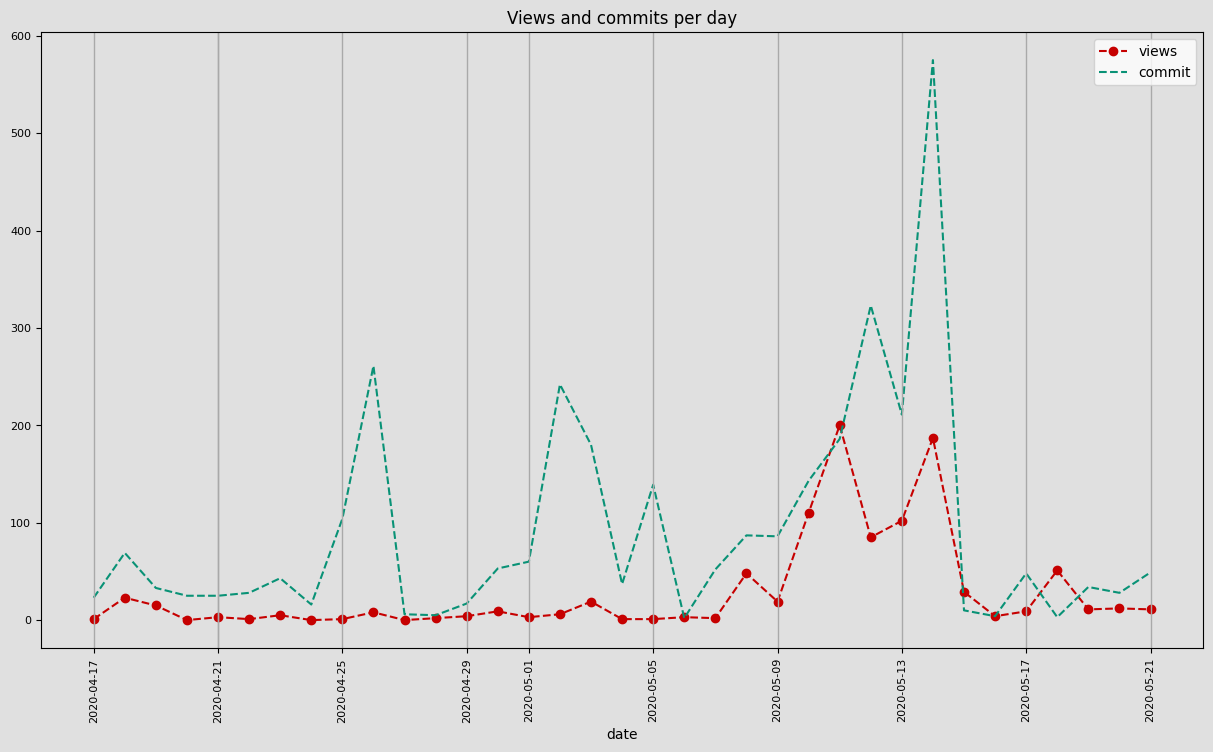

In [4]:
nes_date = ['2020-04-17', '2020-04-21', '2020-04-21', '2020-04-25', '2020-04-29', '2020-05-01', '2020-05-05', '2020-05-09', '2020-05-13', '2020-05-17', '2020-05-21']

nes_date = [pd.to_datetime(item).date() for item in nes_date]

data_plot=data[(data['date']>=nes_date[0])&(data['date']<=nes_date[-1])]

ax = data_plot.plot(
    x='date',
    y=['views', 'commit'],
    title = 'Views and commits per day',
    figsize=(15, 8),
    style=['o--', '--'],
    color=["#c60000", "#099276"],
    fontsize=8,
    rot=90
)

fig = ax.get_figure()

fig.set_facecolor('#e0e0e0')
ax.set_facecolor('#e0e0e0')

for date in nes_date:
    ax.axvline(x=date, color='darkgray', linewidth=1)


##### 4.Сколько раз количество просмотров превышало 150?<br>Ответ: 2

##### 5.Close connect:

In [5]:
connect.close()